In [1]:
using HomotopyContinuation
using DynamicPolynomials
@polyvar x[1:3] y[1:3] a b r
f = [sum(randn(6) .* [1, x[j], y[j], x[j]*y[j], x[j]^2, y[j]^2]) for j in 1:3]
F = System([
    f; # conics
    [(x[j]-a)^2 + (y[j]-b)^2 - r for j in 1:3]; # circles
    [2*(x[j] - a)*differentiate(f[j], y[j]) - 2*(y[j] - b)*differentiate(f[j], x[j]) for j in 1:3]
])
res = solve(F)

Tracking 256 paths... 100%|█████████████████████████████| Time: 0:00:08
  # paths tracked:                  256
  # non-singular solutions (real):  184 (26)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         184 (26)


Result with 184 solutions
• 256 paths tracked
• 184 non-singular solutions (26 real)
• random_seed: 0xe6f47823
• start_system: :polyhedral


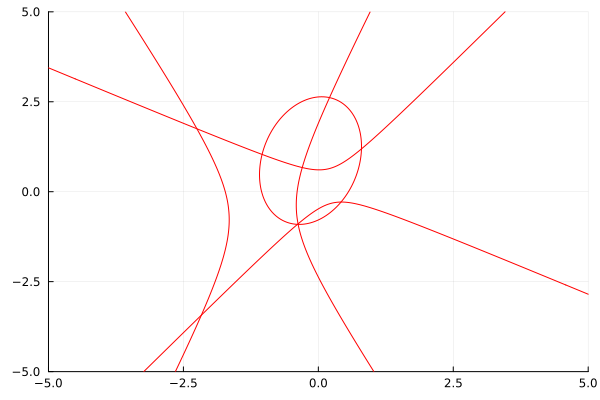

In [2]:
using Plots

x = y = range(-20, stop = 20, length = 1000)
lim = 5
p = contour(x, y, (x, y) -> f[1](x, y), levels=[0], xlims=(-lim, lim), ylims=(-lim, lim), legend=false, color=:red)
contour!(p, x, y, (x, y) -> f[2](x, y), levels=[0], color=:red)
contour!(p, x, y, (x, y) -> f[3](x, y), levels=[0], color=:red)

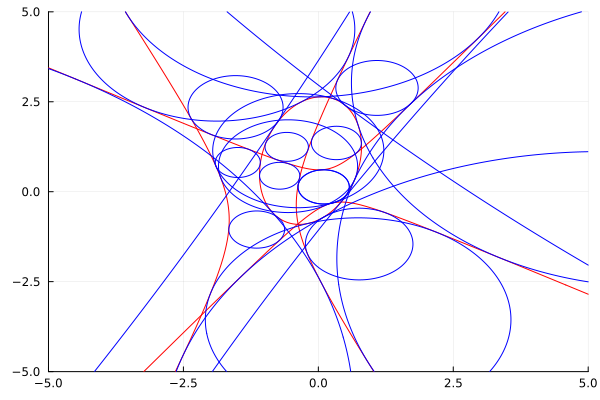

In [3]:
for sol in real_solutions(res)
    a = sol[7]
    b = sol[8]
    r = sol[9]
    contour!(p, x, y, (x, y) -> (x-a)^2 + (y-b)^2 - r, levels=[0], color=:blue)
end
p